# Bayesian Inference

## Bayes Theorem and Implementation

**Bayes' Theorem**

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

where:

$$
P(B) = P(B|A) \cdot P(A) + P(B|\neg A) \cdot P(\neg A)
$$

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B|A) \cdot P(A) + P(B|\neg A) \cdot (1 - P(A))}
$$


In [1]:
# 1. Bayes Theorem

def bayes_theorem(
    prior_A: float,
    likelihood_B_given_A: float,
    likelihood_B_given_not_A: float
):
    """
    Computes P(A|B) using Bayes' Theorem.

    Parameters:
    prior_A (float) : P(A) - Prior probability of A (e.g., having the disease).
    likelihood_B_given_A (float) : P(B|A) - Likelihood of B given A (e.g., testing positive given disease).
    likelihood_B_given_not_A (float) : P(B|¬A) - Likelihood of B given NOT A (false positive rate).

    Returns:
    float : P(A|B) - Posterior probability of A given B.
    """
    prior_not_A = 1 - prior_A # P(¬A) - Probability of NOT having the disease
    # Total probability of B (the test being positive)
    marginal_B = (likelihood_B_given_A * prior_A) + (likelihood_B_given_not_A * prior_not_A)
    # Apply Bayes' Theorem
    posterior_A_given_B = (likelihood_B_given_A * prior_A) / marginal_B
    return posterior_A_given_B

In the Disease Testing Example:
- A = "Person has the disease."
- B = "Person tests positive."

In [2]:
# Given values for the disease test scenario
prior_A = 0.01  # Prior probability of disease (1% of the population)
likelihood_B_given_A = 0.95  # Sensitivity (True Positive Rate)
likelihood_B_given_not_A = 0.05  # False Positive Rate

# Call the bayes_theorem function to calculate the posterior probability
posterior_A_given_B = bayes_theorem(prior_A, likelihood_B_given_A, likelihood_B_given_not_A)

# Print the result
print(f"P(Disease | Positive) = {posterior_A_given_B:.4f}")

P(Disease | Positive) = 0.1610


In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

def bayes_theorem(prior_A, likelihood_B_given_A, likelihood_B_given_not_A):
    """
    Computes P(A|B) using Bayes' Theorem.

    Parameters:
    prior_A (float) : P(A) - Prior probability of A (e.g., having the disease).
    likelihood_B_given_A (float) : P(B|A) - Likelihood of B given A (e.g., testing positive given disease).
    likelihood_B_given_not_A (float) : P(B|¬A) - Likelihood of B given NOT A (false positive rate).

    Returns:
    float : P(A|B) - Posterior probability of A given B.
    """
    prior_not_A = 1 - prior_A  # P(¬A)

    # Total probability of B (the test being positive)
    marginal_B = (likelihood_B_given_A * prior_A) + (likelihood_B_given_not_A * prior_not_A)

    # Apply Bayes' Theorem
    posterior_A_given_B = (likelihood_B_given_A * prior_A) / marginal_B
    return posterior_A_given_B

def update_plot(prior_A, likelihood_B_given_A, likelihood_B_given_not_A):
    """
    Updates the Bayes' Theorem plot dynamically.
    """
    result = bayes_theorem(prior_A, likelihood_B_given_A, likelihood_B_given_not_A)

    # Bar plot to visualize probabilities
    labels = ['Prior P(A)', 'Likelihood P(B|A)', 'False Positive P(B|¬A)', 'Posterior P(A|B)']
    values = [prior_A, likelihood_B_given_A, likelihood_B_given_not_A, result]

    plt.figure(figsize=(8, 5))
    plt.bar(labels, values, color=['blue', 'orange', 'red', 'green'])
    plt.ylim(0, 1)
    plt.ylabel('Probability')
    plt.title('Bayes Theorem Probability Visualization')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Show percentage labels
    for i, v in enumerate(values):
        plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12, fontweight='bold')

    plt.show()
    
# Interactive sliders for Jupyter Notebook
prior_A_slider = widgets.FloatSlider(min=0.001, max=1, step=0.01, value=0.01, description='P(A)')
likelihood_B_given_A_slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.95, description='P(B|A)')
likelihood_B_given_not_A_slider = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.05, description='P(B|¬A)')

# Interactive output
widgets.interactive(update_plot, 
                    prior_A=prior_A_slider, 
                    likelihood_B_given_A=likelihood_B_given_A_slider, 
                    likelihood_B_given_not_A=likelihood_B_given_not_A_slider)


interactive(children=(FloatSlider(value=0.01, description='P(A)', max=1.0, min=0.001, step=0.01), FloatSlider(…

## Bayes Engine

To demonstrate how Bayes' Theorem works and how the prior probability is updated to a posterior probability as more data is observed, we can create a Bayesian engine in Python that gradually updates the belief (posterior) based on new evidence.

This will simulate the process where the prior (initial belief) gets updated with new observations, moving closer to the true probability as more data is observed.

Steps to Demonstrate Bayes' Theorem in Action:
Start with an initial prior probability 
𝑃
(
𝐴
)
P(A), representing your belief about the state of the world before any evidence is observed.
Introduce new evidence over time, where each piece of data will provide a likelihood 
𝑃
(
𝐵
∣
𝐴
)
P(B∣A) (likelihood of the evidence given the state) and 
𝑃
(
𝐵
∣
¬
𝐴
)
P(B∣¬A) (likelihood of the evidence given the negation of the state).
Use Bayes' Theorem to update the posterior probability 
𝑃
(
𝐴
∣
𝐵
)
P(A∣B), which represents your belief after incorporating the new evidence.


We will simulate this process where:

The prior probability is updated as more data is observed.
The posterior probability reflects this updated belief after each piece of new data (evidence).

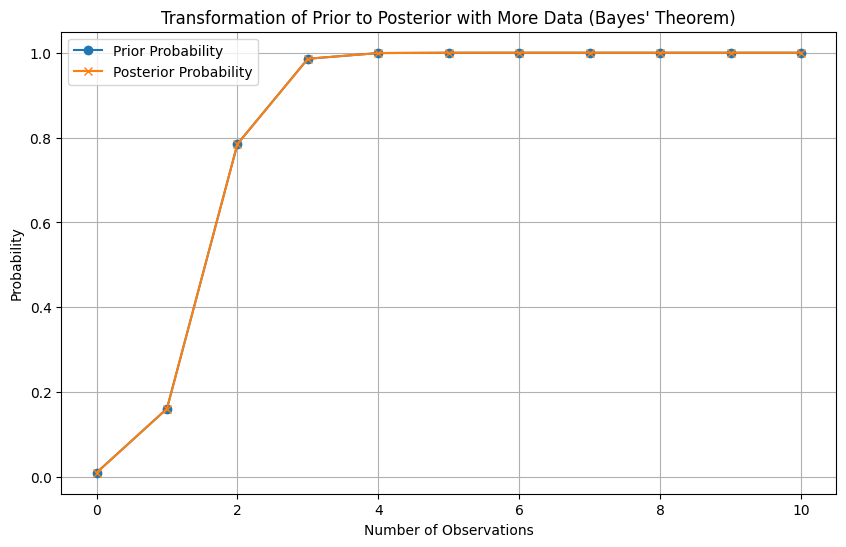

Final Posterior Probability after 10 observations: 1.0000


In [3]:
import matplotlib.pyplot as plt

def bayes_theorem(prior_A, likelihood_B_given_A, likelihood_B_given_not_A):
    """
    Computes P(A|B) using Bayes' Theorem.

    Parameters:
    prior_A (float) : P(A) - Prior probability of A (e.g., having the disease).
    likelihood_B_given_A (float) : P(B|A) - Likelihood of B given A (e.g., testing positive given disease).
    likelihood_B_given_not_A (float) : P(B|¬A) - Likelihood of B given NOT A (false positive rate).

    Returns:
    float : P(A|B) - Posterior probability of A given B.
    """
    prior_not_A = 1 - prior_A # P(¬A) - Probability of NOT having the disease
    # Total probability of B (the test being positive)
    marginal_B = (likelihood_B_given_A * prior_A) + (likelihood_B_given_not_A * prior_not_A)
    # Apply Bayes' Theorem
    posterior_A_given_B = (likelihood_B_given_A * prior_A) / marginal_B
    return posterior_A_given_B

# Simulation settings
prior_A = 0.01  # Initial belief: 1% chance of disease
likelihood_B_given_A = 0.95  # Sensitivity (True Positive Rate)
likelihood_B_given_not_A = 0.05  # False Positive Rate

# Number of observations to simulate
num_observations = 10

# Lists to store results for plotting
priors = [prior_A]
posteriors = [prior_A]

# Simulate the process of observing data and updating the belief
for i in range(num_observations):
    # Update the posterior probability given new data (new positive test result)
    posterior_A_given_B = bayes_theorem(priors[-1], likelihood_B_given_A, likelihood_B_given_not_A)
    posteriors.append(posterior_A_given_B)
    priors.append(posterior_A_given_B)  # Update the prior for the next iteration

# Plotting the transformation of the prior to the posterior as more data is observed
plt.figure(figsize=(10, 6))
plt.plot(range(num_observations + 1), priors, label="Prior Probability", marker='o')
plt.plot(range(num_observations + 1), posteriors, label="Posterior Probability", marker='x')
plt.xlabel("Number of Observations")
plt.ylabel("Probability")
plt.title("Transformation of Prior to Posterior with More Data (Bayes' Theorem)")
plt.legend()
plt.grid(True)
plt.show()

# Output the final posterior probability after all observations
print(f"Final Posterior Probability after {num_observations} observations: {posteriors[-1]:.4f}")


**Explanation of Code:**
- We start with a prior probability 
𝑃
(
𝐴
)
P(A) of having the disease (e.g., 1% of the population has the disease).
- Each time we "observe" new evidence (in this case, a positive test result), we apply Bayes' Theorem to update our belief:
$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

    where:

$$
P(B) = P(B|A) \cdot P(A) + P(B|\neg A) \cdot P(\neg A)
$$

- After each observation, the posterior is used as the new prior for the next update.
- We plot the prior and posterior values for each observation to visualize the evolution of belief over time.